In [1]:
import pandas as pd
import numpy as np
import sklearn

In [3]:
from sklearn.datasets import load_iris
iris_data = load_iris()

X = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
y = iris_data.target

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

Text(0, 0.5, 'accuracy')

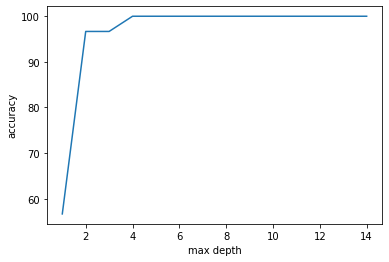

In [6]:
# finding the best max_depth for our model
from sklearn.tree import DecisionTreeClassifier

accuracy = []
for i in range(1,15):
    model = DecisionTreeClassifier(max_depth=i, random_state=0)
    model.fit(X_train, y_train)
    accuracy.append(model.score(X_test, y_test)*100)

import matplotlib.pyplot as plt
plt.plot(range(1,15), accuracy)
plt.xlabel("max depth")
plt.ylabel("accuracy")



In [7]:
# we have to keep the max depth greater than 4
# using grid searchcv for getting the best other hyperparameters

from sklearn.model_selection import GridSearchCV
params = [{'criterion' : ['gini','entropy'], 'max_depth' : [4,5,6]} ]

tree = DecisionTreeClassifier()

model = GridSearchCV(tree, params, cv=10)
model.fit(X_train, y_train)
model.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [10]:
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
tree.fit(X_test, y_test)
tree.score(X_test, y_test)

1.0